# PHAS0056 Coursework A - Curve Fitting

SN: 22156658

## Section 1: Function Definition and Testing

In [1]:
#import modules required for task
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

### Define functions

In [2]:

def polyModel(x,theta):
    ''' 
    Caclulates y(x)=∑iθixi

    Input: 
    - x = array of x values 
    - theta = array of theta values

    Output:
    Returns an array of calculated values for given x and theta values.

    '''

    # This calculation can be thought of as a dot product between a column vector containing all x values
    # to the power of corresponding index of theta and an column vector containing the theta values.
    # This function utilises numpys broadcasting feature which allows me to dot an (len(x),len(theta)) array 
    # with a (1,len(theta)) array because it artificially replicates the latter to match the shape of the first.

    #Return y(x)
    return np.dot(np.array([x**i for i in range(len(theta))]).T,theta)


def polyModelWithNoise(x,theta,sigma):
    '''
    Calculates y(x)=∑iθixi + some Gaussian noise 

    Input:
     - x: array of x values
     - theta: array of theta values
     - sigma: standard devation of Gaussian noise

    '''
    # Here I call the PolyModel function to be more efficient and then add some Gaussian noise centered at x = 0 
    # with a standard devation defined in the function input

    # Return y(x) + noise
    return polyModel(x,theta) +  np.random.normal(0,sigma,(len(x)))
    



Comments: 

Both functions have been written as efficiently as I could write them. There are many ways you could have written them; for example, you could use a for loop. Whilst a for loop would improve the clarity of the function by allowing me to more easily see what is happening inside the function, the function would lose compute efficiency in comparison with the broadcasting method as I would need to perform len(x) times many more operations for the same output. At this level compute efficiency isn't that important but as calculations grow, so does the need to rapidly decrease calculation time.

###  Example with plot

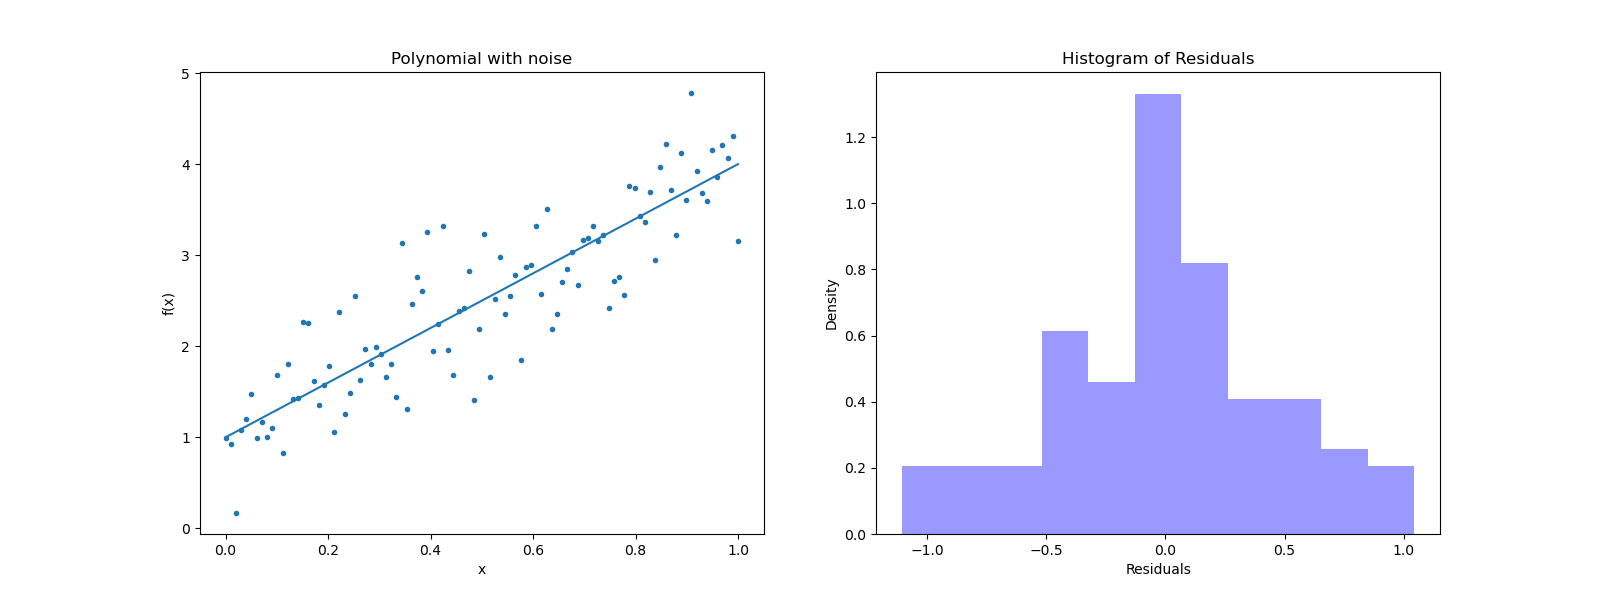

In [3]:

# Create x and theta arrays
x = np.linspace(0,1,100)
theta = np.array([1,3])

# Generate outpouts for both version of the model
polyModel_out = polyModel(x,theta)
polyModelWithNoise_out = polyModelWithNoise(x,theta,0.5)

# Create subplots space
fig, ax = plt.subplots(1,2,figsize=(16,6))

# Plot PolyModel and PolyModelWithNoise together with labelled axis and title
ax[0].plot(x,polyModel_out.T)
ax[0].scatter(x,polyModelWithNoise_out.T,marker='.')
ax[0].set_title('Polynomial with noise')
ax[0].set_ylabel('f(x)')
ax[0].set_xlabel('x')

# Caclulate residuals
residuals = polyModel_out.T - polyModelWithNoise_out.T

# Plot histogram of residuals to demonstrate that the noise is normally distributed with labelled axis and title
ax[1].hist(residuals, bins=11, density=True, alpha=0.4, color='b')
ax[1].set_title('Histogram of Residuals')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Density');


Comments:

The line in the left plot is y(x) given theta = (1,3) generated 0 to 1 with 100 linear spacing. The dots around the line represent the same output but with the additional noise term. The right hand plot shows the distribution of the residuals between the two models, clearly showing the normal distribution of the noise.

## Section 2: Gradient Descent

### Function defining

In [4]:
def polyGradient(x,theta):
    '''
    Cacluates gradient of PolyModel function y(x)=∑iθixi w.r.t all theta values.

    Input:
     - x: array of x values.
     - theta: array of theta values.

    Output:
    Returns (len(x),len(theta)) 2D array of gradients calculated at each x value w.r.t given theta.
    '''
    # The gradient of this function w.r.t to a given theta is simply the x values for that theta to
    # power of the index of theta.

    # Return array of calculated gradients. 
    return np.array([x**i for i in range(len(theta))])


def samples(nsamples):
    '''
    Generates len(nsamples) long array of uniformly distributed random points between 0 & 1.

    Input: 
     - nsamples: integer determining number of points to be generated.

     Output:
    Returns array of uniformly distrbuted points  
    '''

    # Return array of random values
    return np.random.uniform(0.0,1.0,nsamples)

### Stochastic gradient descent alogrithm

In [5]:
# Define number of iterations in alogrithm and learning rate eta 
nsteps = 100
eta = 0.5

# Create empty arrays for mse, theta values and empty list for devations 
mseVals = np.zeros(nsteps)
thetaVals = np.zeros((nsteps+1,2))
deviation = []

# Create list of initial theta values guess and store as first value of the theta values array
theta = [-1,0.5]
thetaVals[0] = theta

# Create for loop to iterate gradient descent algorithm over range(nsteps) (100 times)
for i in range(nsteps):

    # Generate 10 random x points for fitting
    x = samples(10)

    # Calculate loss function (mse) for current guess
    deviation = polyModel(x,theta) - polyModelWithNoise(x,[1,4],0.5)
    mseVal = np.average(deviation**2)

    # Store current loss funcion value
    mseVals[i] = mseVal

    # Calculate new theta using gradient descent
    theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    
    # Store new theta value in array 
    thetaVals[i+1]=theta  

# Print final devation
print(f'Final loss: {mseVals[-1]}')
print(f'Final theta: {thetaVals[-1]}')

Final loss: 0.2640964042102275
Final theta: [1.10577203 3.95407798]


Comments:

### Plot MSE against count step

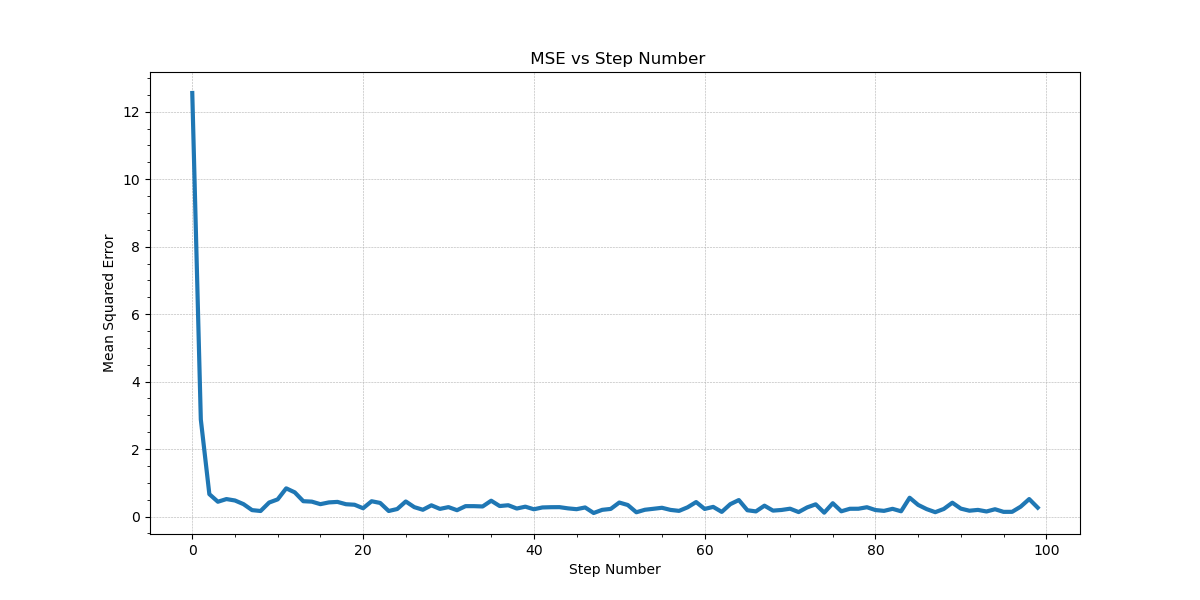

In [6]:
# Create figure and label axis
plt.figure(figsize=(12,6))
plt.xlabel("Step Number")
plt.ylabel(r"Mean Squared Error")
plt.title(' MSE vs Step Number')
plt.grid(ls='--',lw=0.4)
plt.minorticks_on()

# Generate array of length len(nsteps)+1 to include initial guess
count=np.arange(nsteps+1)  

# Plot MSE against count
plt.plot(count[:-1],mseVals,linewidth=3)


Comments:



### Higher order polynomials

Here I will fit a 1st, 3rd and 7th order polynomial to a 3rd order polynomial with truth parameters [1,4,3,2]. I expect that the first order will perform the worst and the 3rd and 7th order will have similar results, however, the 7th order is likely to be overfitting which could be testsed using chi-squared reduced. The gradient descent algorithm calculates

In [7]:
# Define number of iterations in alogrithm and learning rate eta 
nsteps = 100
eta = 0.5

# Create empty list to store theta values and mse values for each order polynomial
theta_values = []
mse_values = []
y_noise_order = []

# Create list of orders to be tested
orders = [2,4,8]


# Use for loop to perform gradient descent algorithm seperately for each order
for i in orders:
    
    # Create empty arrays for theta and mse values and empty list for deviation for each iteration for given order
    mseVals = np.zeros(nsteps)
    thetaVals = np.zeros((nsteps+1,i))
    deviation = []
    
    # Create array of zeros for given order 
    theta = np.zeros(i) 
    thetaVals[0] = theta

    # Create for loop to caluclate optimised theta values based upon gradient
    for j in range(nsteps):

        # Generate 10 random x samples
        x = samples(10)
        
        # Calculate loss function (mes) for step
        deviation = polyModel(x,theta) - polyModelWithNoise(x,[1,4,3,2],0.5)
        mseVal = np.average(deviation**2)
        mseVals[j] = mseVal

        # Update theta value using gradient     
        theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
        
        # Store new theta value
        thetaVals[j+1]=theta 

    # Append lists of theta amd mse values
    theta_values.append(thetaVals)
    mse_values.append(mseVals)

# Print final calculated theta values
print(f'Final theta values for 1st order: {theta_values[0][-1]}')
print(f'Final theta values for 3rd order: {theta_values[1][-1]}')
print(f'Final theta values for 7th order: {theta_values[2][-1]}')

Final theta values for 1st order: [0.28069516 8.58166128]
Final theta values for 3rd order: [1.01544942 3.16339007 2.92685058 2.55994802]
Final theta values for 7th order: [ 1.30332604  3.46274874  2.48752043  1.58357698  0.92762172  0.46608907
  0.14011565 -0.09275432]


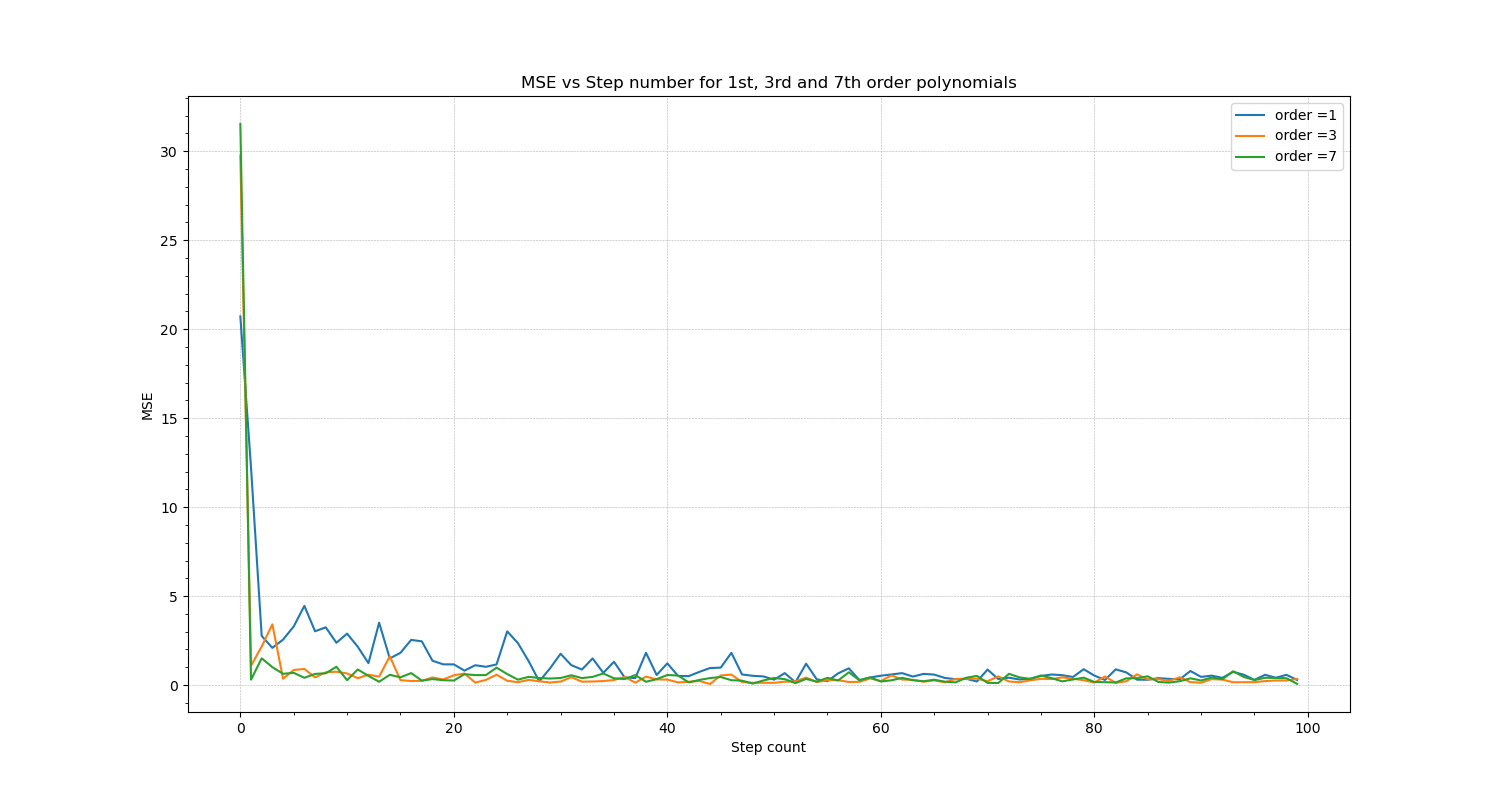

In [8]:
# Create plot for mse values and label title and axis
plt.figure(figsize=(15,8))
plt.grid(ls='--',lw=0.4)
plt.minorticks_on()
plt.ylabel('MSE')
plt.xlabel('Step count')
plt.title('MSE vs Step number for 1st, 3rd and 7th order polynomials')

# Create array of count values
count=np.arange(nsteps+1) 

# Create list to plot
index = [0,1,2]

# Use for loop to plot mse array for each value
for i in index:
    plt.plot(count[:-1],mse_values[i],label=f'order ={len(theta_values[i][-1])-1}')

# Add legend to plot
plt.legend();    

Comments:

The 7th order fit rapidly converges, whils the linear fit and 3rd order model take nearly 50 iterations to become stable. This can be explained by the greater number of terms in the 7th order fit allowing superior flexibility in the model to find a stable solution.

### Plot polynomials for trained and untrained regions

Qualitative comparisons can be drawn between fitting orders by plotting PolyModel using the fitted parameters and the truth values.

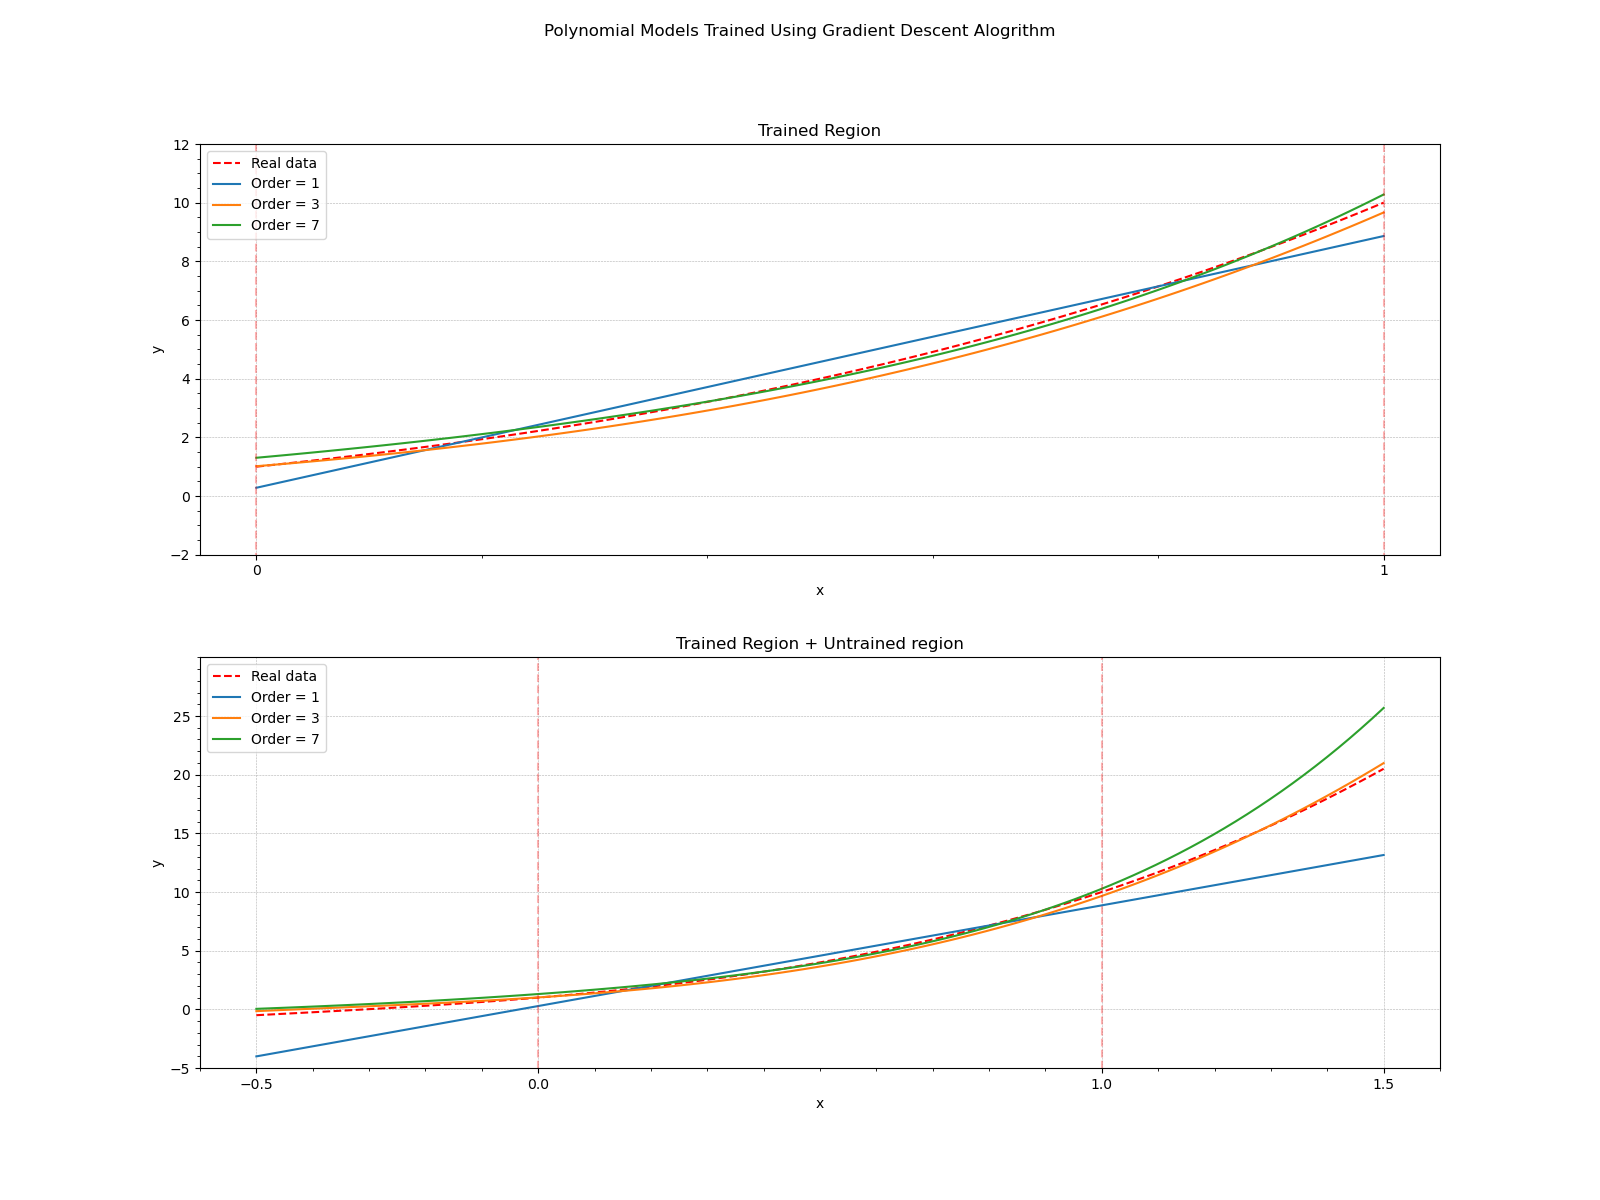

In [9]:
# Create arrays of linearly spaced x values for trained and untrained 
x_trained= np.linspace(0,1,100)
x_expanded = np.linspace(-0.5,1.5,100)
# Create arrays of y data for both regions
y_trained = polyModel(x_trained,[1,4,3,2])
y_trained_noise = polyModelWithNoise(x_trained,[1,4,3,2],0.5)
y_expanded = polyModel(x_expanded,[1,4,3,2])
y_expanded_noise = polyModelWithNoise(x_expanded,[1,4,3,2],0.5)

# Create list of index values to use for plotting
index = [0,1,2]

# Create subplots to use to plot
fig, ax = plt.subplots(2,1,figsize=(16,12),gridspec_kw = {'wspace':0.2, 'hspace':0.25})

# Add overall title
plt.suptitle('Polynomial Models Trained Using Gradient Descent Alogrithm')

# Plot real 3rd order polynomial in trained region
ax[0].plot(x_trained,y_trained,label='Real data',ls='--',color='r')
#ax[0].scatter(x_trained,y_trained_noise,label='Real data',ls='--',color='r',alpha=0.4,marker='.')

# Plot polynomials using theta values obtained through gradient descent algorithm
for i in index:
    ax[0].plot(x_trained,polyModel(x_trained,theta_values[i][-1]),label=f'Order = {len(theta_values[i][-1])-1}')

# Make the plot look nice
ax[0].legend()
ax[0].set_ylim(-2,12)
ax[0].vlines(0,-50,50,ls='--',color='r',alpha=0.3)
ax[0].vlines(1,-50,50,ls='--',color='r',alpha=0.3)
ax[0].minorticks_on()
ax[0].grid(ls='--',lw=0.4)
ax[0].set_xticks([0,1])
ax[0].set_title('Trained Region')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# Plot real 3rd order data in untrained region
ax[1].plot(x_expanded,y_expanded,label='Real data',ls='--',color='r')
#ax[1].scatter(x_expanded,y_expanded_noise,label='Real data',ls='--',color='r',alpha=0.4,marker='.')

# Plot polynomials using theta values obtained through gradient descent algorithm
for i in index:
    ax[1].plot(x_expanded,polyModel(x_expanded,theta_values[i][-1]),label=f'Order = {len(theta_values[i][-1])-1}')

# Make plot look nice
ax[1].legend()
ax[1].grid(ls='--',lw=0.4)
ax[1].minorticks_on()
ax[1].set_xticks([-0.5,0,1,1.5])
ax[1].set_yticks([-5,0,5,10,15,20,25])
ax[1].set_ylim(-5,30)
ax[1].vlines(0,-50,50,ls='--',color='r',alpha=0.3)
ax[1].vlines(1,-50,50,ls='--',color='r',alpha=0.3)
ax[1].set_xlabel('x')
ax[1].set_title('Trained Region + Untrained region')
ax[1].set_ylabel('y');

Comments:

In the trained region, the 1st order model performs poorly in comparison with the other models. This is because a linear fit cannot capture the curvature of the real data, hence only having two points of agreement, where the real data intercepts the straight line. The middle section shows that the linear fit is a good approximation between roughly x = 0.3 to x = 0.7, where the real 3rd order data has a more linear gradient.

The 3rd and 7th order fits perform very similarly between x = 0.3 and x = 0.8, where they both are consistent with the data following the same overall steepness and magnitude. There is a discrepancy however, outside this region, where the 3rd order performs slightly better in terms of matching the magnitude of the real data. Towards the increasing x values close to 1, the 7th order fit appears to become steeper, which can be explained by higher order terms beginning to take effect past 1.

In the untrained region of -0.5<x<0, the linear fit performs very poorly, lacking the terms necessary to describe the relative flatness of the data around x = 0. The 3rd and 7th order fits perform very similarly in this region, matching the data well, however slightly overestimating the magnitude, likely due to the lack of data available to model the real data with in the training region.

In the region 1<x<1.5, also untrained, the linear fit again performs poorly, failing to describe the increase in the real data due a lack of missing terms. The 3rd order performs considerably better than the 7th in this region. The 7th order fit increases much faster than the actual data, which can simply be explained by higher order terms contributing a large increase in magnitude after passing 1, at which point the 4th, 5th and 7th order contributions become significantly greater. The 3rd order fit remains fairly consistent, with only a slight overshoot. 

Overall the 3rd order model has performed the best in describing the real function. This was as expected since the linear function cannot curve and the 7th order fit will increase too rapidly. 


### Plot residuals for each fit

Text(0.5, 0, 'x')

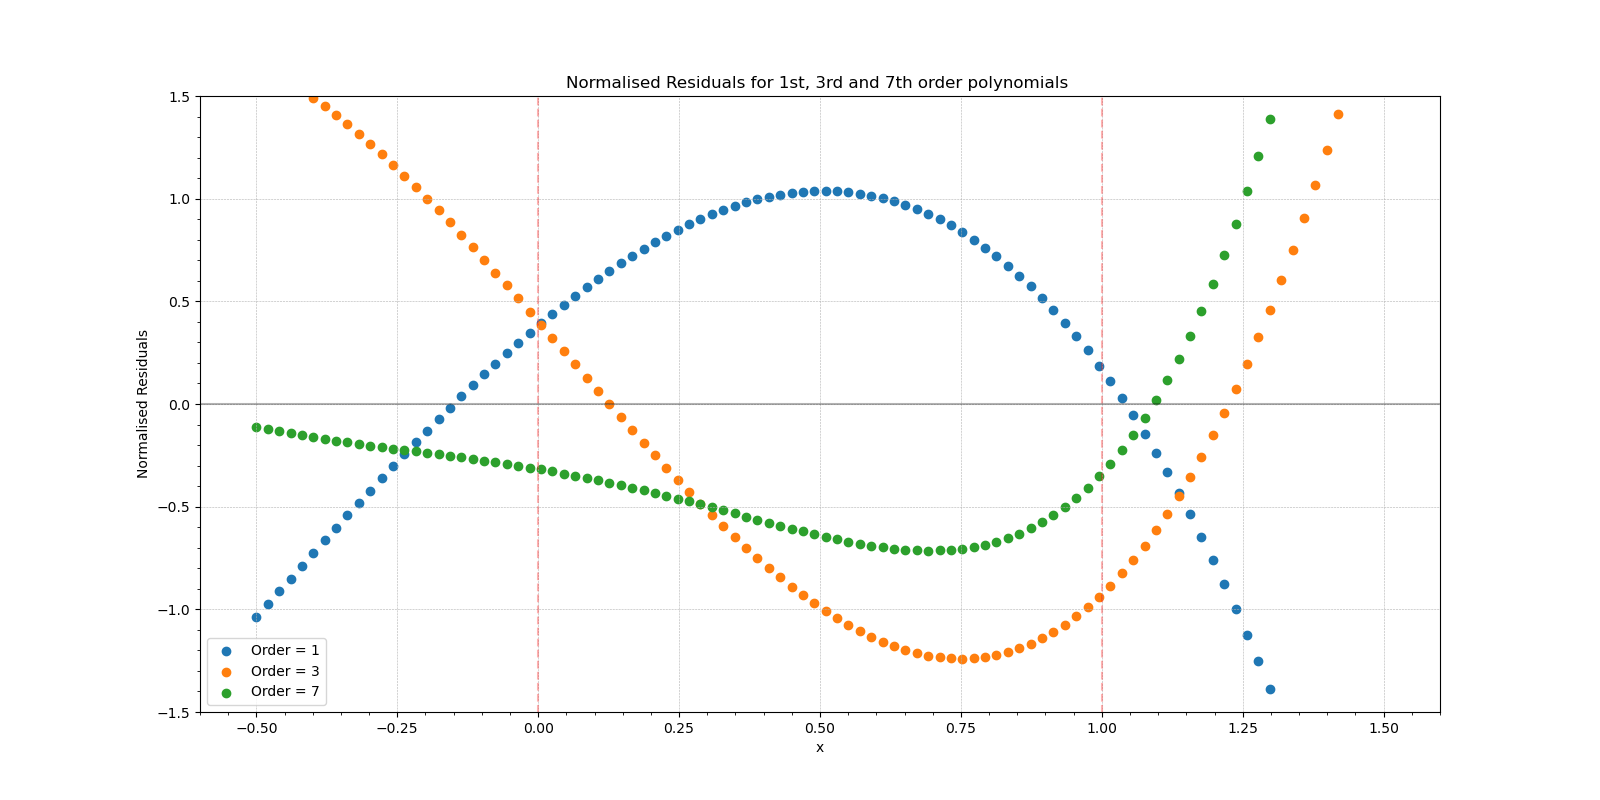

In [10]:
# Create arrays to plot containing x and y data
x_plot = np.linspace(-0.5,1.5,100)
y_real = polyModel(x_plot,[1,4,3,2])

# Create list of index
index = [0,1,2]

# Create figure for plotting
plt.figure(figsize=(16,8))
plt.grid(ls='--',lw=0.4)
plt.minorticks_on()

# Use for loop to calculate and plot normalised residuals for each model.
for i in index:
    
    # Use polyModel to caluclate data for given model
    y_model = polyModel(x_plot,theta_values[i][-1])

    # Caclulate normalised residuals between the fitted curve and actual data
    residual = y_model - y_real
    mean = np.mean(residual)
    std_dev = np.std(residual)
    norm_residual = (residual - mean) / std_dev 
    
    # Plot residuals
    plt.scatter(x_plot,norm_residual,label=f'Order = {len(theta_values[i][-1])-1}')
    
# Make plot look nice including title and axis labels
plt.legend()
plt.ylim(-1.5,1.5)
plt.vlines(0,-50,50,ls='--',color='r',alpha=0.3)
plt.vlines(1,-50,50,ls='--',color='r',alpha=0.3)
plt.axhline(0,0,100,color='black',alpha=0.3)
plt.title('Normalised Residuals for 1st, 3rd and 7th order polynomials ')
plt.ylabel('Normalised Residuals')
plt.xlabel('x')


Comments:

The normalised residuals show that as mentioned previously, the linear fit is very incapable of describing the trends of data due the lack of higher order terms. Moreover, here it appears that upon closer inspection the 7th order fit slightly better in the trained region compared with the 3rd, which couldn't be qualitatively realised before. This is likely because the 7th order fit has more flexibility in matching the smaller changes in the data in this region, however the residuals quickly rise after 1, indicating the loss of reliability after this point. This plot still indicates that the 3rd order is most effective at modelling the data as it has the smoothest transition after x = 1 and has the smallest residuals for x < 0.
